## Skip-gram 

In [11]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt
from tqdm import tqdm

dtype = torch.FloatTensor

In [2]:
sentences = ["i like dog", "i like cat", "i like animal",
             "dog cat animal", "apple cat dog like", "dog fish milk like",
             "dog cat eyes like", "i like apple", "apple i hate",
             "apple i movie book music like", "cat dog hate", "cat dog like"]

In [4]:
word_sequence = " ".join(sentences).split()

In [7]:
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)}

In [9]:
# Word2Vec Parameter
batch_size = 20
embedding_size = 2
voc_size = len(word_list)
print('voc size :', voc_size)

voc size : 13


In [10]:
def random_batch(data, size):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(data)), size, replace=False)
    
    for i in random_index:
        random_inputs.append(np.eye(voc_size)[data[i][0]]) # target
        random_labels.append(data[i][1])
    
    return random_inputs, random_labels

In [16]:
# make skip_gram of on size window
skip_grams = []
for i in tqdm(range(1, len(word_sequence) - 1)):
    target = word_dict[word_sequence[i]]
    contexts = [word_dict[word_sequence[i-1]], word_dict[word_sequence[i+1]]]
    
    for w in contexts:
        skip_grams.append([target, w])

100%|██████████| 40/40 [00:00<00:00, 178481.02it/s]


In [18]:
skip_grams[:5]

[[12, 2], [12, 3], [3, 12], [3, 2], [2, 3]]

In [19]:
word_sequence[:5]

['i', 'like', 'dog', 'i', 'like']

In [21]:
print(word_dict['like'])
print(word_dict['i'])
print(word_dict['dog'])

12
2
3


In [25]:
# model 
class Word2Vec(nn.Module):
    def __init__(self):
        super(Word2Vec, self).__init__()
        
        # W and W.t is not Transpose relationship
        self.W = nn.Parameter(-2 * torch.rand(voc_size, embedding_size) + 1).type(dtype)
        self.WT = nn.Parameter(-2 * torch.rand(embedding_size, voc_size) + 1).type(dtype)
        
    def forward(self, X):
        # X : [batch_size, voc_size]
        hidden_layer = torch.matmul(X, self.W) # batch_size, embedding_size
        output_layer = torch.matmul(hidden_layer, self.WT) # batch_size, voc_size
        return output_layer

In [26]:
model = Word2Vec()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [37]:
# Tranining

for epoch in range(3000):
    input_batch, target_batch = random_batch(skip_grams, batch_size)
    
    input_batch = Variable(torch.Tensor(input_batch))
    target_batch = Variable(torch.LongTensor(target_batch))
    
    optimizer.zero_grad()
    output = model(input_batch)
    
    # output: [batch_size, voc_size], target_batch : [batch_size] (LongTensor, not noe-hot)
    loss = criterion(output, target_batch)
    if (epoch +1) % 500 == 0:
        print('[Epoch]: ' '%04d' % (epoch + 1), '[Loss]:', '{:.6f}'.format(loss))
    
    loss.backward()
    optimizer.step()

[Epoch]: 0500 [Loss]: 1.872254
[Epoch]: 1000 [Loss]: 1.699118
[Epoch]: 1500 [Loss]: 1.664044
[Epoch]: 2000 [Loss]: 1.589988
[Epoch]: 2500 [Loss]: 1.673327
[Epoch]: 3000 [Loss]: 1.677439


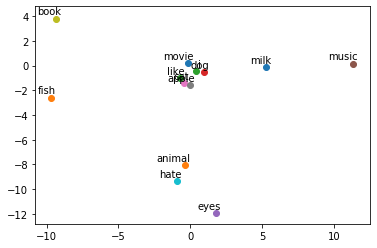

In [38]:
for i, label in enumerate(word_list):
    W, WT = model.parameters()
    x, y = float(W[i][0]), float(W[i][1])
    plt.scatter(x, y)
    plt.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    
plt.show()